# **Multiclass Neural Network Digit Recognition**

Implementing a neural network to perform multiclass classification on a subset of the MNIST dataset, recognizing ten handwritten digits, 0-9.

**Importing packages**

In [1]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt
from custom_utils import *

plt.style.use('./custom.mplstyle')
np.set_printoptions(precision=2)

**Loading dataset**

The dataset is comprised of 5000 training examples of handwritten digits.

*   Each training example is a 20-pixel x 20-pixel grayscale image of the digit.
*   Each pixel is represented by a floating-point number indicating the grayscale intensity at that location.
*   The 20 by 20 grid of pixels is unrolled into a 400-dimensional vector.
*   Each training example becomes a single row in a the data matrix X.
*   In entirety, X is a 5000 x 400 matrix where every row is a training example a handwritten digit image.

The second part of the training set is a 5000 x 1 dimensional vector y that contains labels for the training set.

*   y = 0 if the image is of the digit 0.
*   y = 4 if the image of the digit is 4 etc.












In [2]:
X, y = load_data()

**Data exploration**

Printing the first element in variable X.

In [3]:
print('The first element of X is: ', X[0])

The first element of X is:  [ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  8.56e-06  1.94e-06 -7.37e-04
 -8.13e-03 -1.86e-02 -1.87e-02 -1.88e-02 -1.91e-02 -1.64e-02 -3.78e-03
  3.30e-04  1.28e-05  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  1.16e-04  1.20e-04 -1.40e-02 -2.85e-02  8.04e-02
  2.67e-01  2.74e-01  2.79e-01  2.74e-01  2.25e-0

Printing the first and last elements in variable y.

In [4]:
print('The first element of y is: ', y[0,0])
print('The last element of y is: ', y[-1,0])

The first element of y is:  0
The last element of y is:  9


Checking the dimensions of X and y.

In [5]:
print('The shape of X is: ' + str(X.shape))
print('The shape of y is: ' + str(y.shape))

The shape of X is: (5000, 400)
The shape of y is: (5000, 1)


**Data visualization**

Visualizing a subset of the training set.

*   Randomly selecting 64 rows from X, mapping each row back to a 20 pixel by 20 pixel grayscale image and displaying the images together.
*   Displaying the label for each image above them.



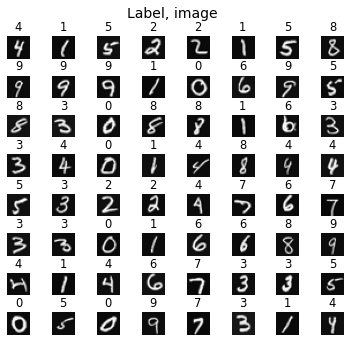

In [6]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91])

for i, ax, in enumerate(axes.flat):
  random_index = np.random.randint(m)
  X_random_reshaped = X[random_index].reshape((20,20)).T
  ax.imshow(X_random_reshaped, cmap='gray')
  ax.set_title(y[random_index, 0])
  ax.set_axis_off()
  fig.suptitle('Label, image', fontsize=14)

**Model definition**

Constructing a three layer network using Keras' sequential model and dense layers with relu activation.

In [7]:
tf.random.set_seed(1234)

model = Sequential(
    [
        tf.keras.layers.InputLayer((400,)),
        tf.keras.layers.Dense(25, activation='relu', name='L1'),
        tf.keras.layers.Dense(15, activation='relu', name='L2'),
        tf.keras.layers.Dense(10, activation='linear', name='L3')
    ], name = 'model_one'
)

Implementing loss function and optimizer.

In [8]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X,y,
    epochs=40
)

Epoch 1/40
157/157 [==============================] - 1s 2ms/step - loss: 1.7094
Epoch 2/40
157/157 [==============================] - 0s 2ms/step - loss: 0.7480
Epoch 3/40
157/157 [==============================] - 0s 2ms/step - loss: 0.4428
Epoch 4/40
157/157 [==============================] - 0s 2ms/step - loss: 0.3463
Epoch 5/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2977
Epoch 6/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2630
Epoch 7/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2361
Epoch 8/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2131
Epoch 9/40
157/157 [==============================] - 0s 2ms/step - loss: 0.2004
Epoch 10/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1805
Epoch 11/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1692
Epoch 12/40
157/157 [==============================] - 0s 2ms/step - loss: 0.1580
Epoch 13/40
157/157 [====

Checking model.

In [9]:
model.summary()

Model: "model_one"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                10025     
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 10)                160       
                                                                 
Total params: 10,575
Trainable params: 10,575
Non-trainable params: 0
_________________________________________________________________


**Testing predictions**

Comparing predictions vs the labels for a random sample of 64 digits.

1/1 [==============================] - 0s 18ms/step


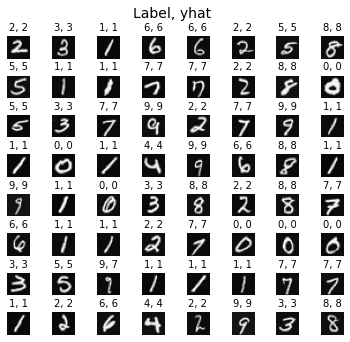

In [10]:
fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13, rect=[0, 0.03, 1, 0.91])

for i, ax in enumerate(axes.flat):
  random_index = np.random.randint(m)
  X_random_reshaped = X[random_index].reshape((20,20)).T
  ax.imshow(X_random_reshaped, cmap='gray')
  prediction = model.predict(X[random_index].reshape(1, 400))
  prediction_p = tf.nn.softmax(prediction)
  yhat = np.argmax(prediction_p)
  ax.set_title(f"{y[random_index, 0]}, {yhat}", fontsize=10)
  ax.set_axis_off()

fig.suptitle("Label, yhat", fontsize=14)
plt.show()

Checking errors.

1/1 [==============================] - 0s 18ms/step
15 errors out of 5000 images


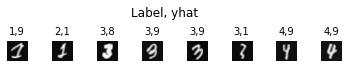

In [11]:
print(f"{display_errors(model,X,y)} errors out of {len(X)} images")